In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [13]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

In [14]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

In [15]:
df = pd.read_csv('m2_survey_data.csv')

In [16]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

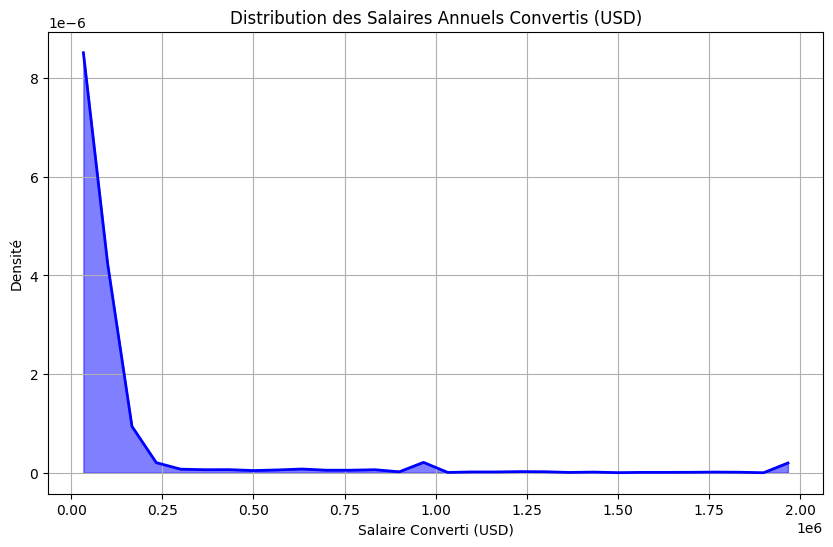

In [30]:
density, bins = np.histogram(df['ConvertedComp'], bins=30, density=True)
bins_center = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(10, 6))
plt.plot(bins_center, density, linewidth=2, color='blue')
plt.fill_between(bins_center, density, alpha=0.5, color='blue')
plt.title('Distribution des Salaires Annuels Convertis (USD)')
plt.xlabel('Salaire Converti (USD)')
plt.ylabel('Densité')
plt.grid(True)
plt.show()

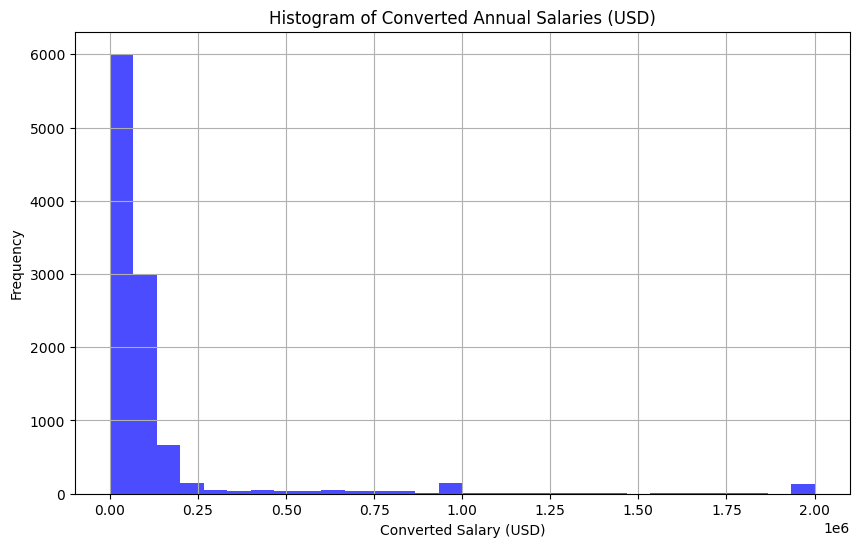

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Converted Annual Salaries (USD)')
plt.xlabel('Converted Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
median_value = df['ConvertedComp'].median()
print('Médian_value :', median_value)


Médian_value : 57745.0


In [20]:
count_men = df[df['Gender'] == 'Man'].shape[0]
print('Number of responders identified as Man:', count_men)


Number of responders identified as Man: 10480


In [21]:
count_woman = df[df['Gender'] == 'Woman'].shape[0]
print('Number of responders identified as Woman:', count_woman)


Number of responders identified as Woman: 731


In [22]:
five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])


min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


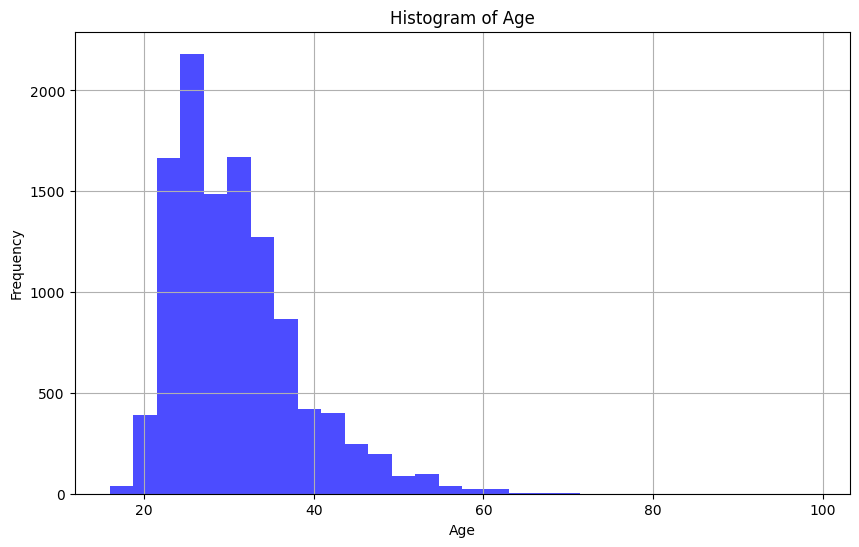

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

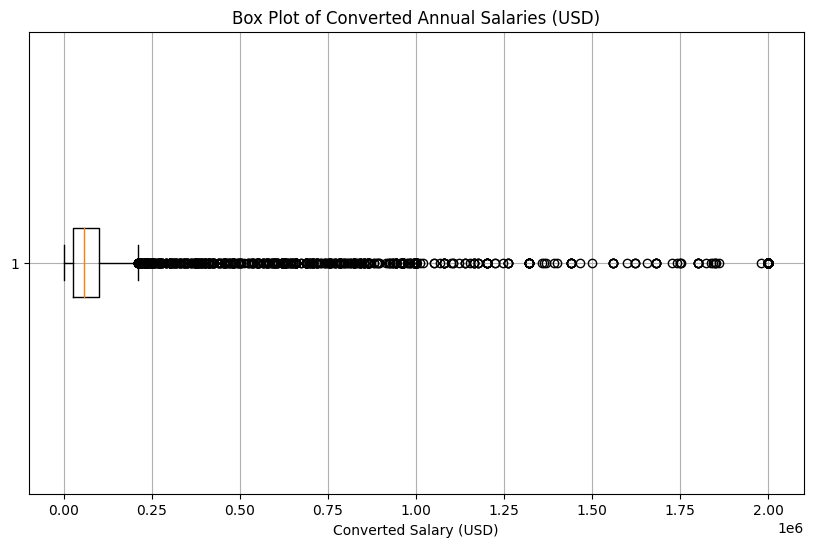

In [24]:
df = df.dropna(subset=['ConvertedComp'])

plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box Plot of Converted Annual Salaries (USD)')
plt.xlabel('Converted Salary (USD)')
plt.grid(True)
plt.show()


In [25]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
print('Interquartile Range for ConvertedComp:', IQR)


Interquartile Range for ConvertedComp: 73132.0


In [26]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


In [27]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]

print('Number of outliers in ConvertedComp:', num_outliers)


Number of outliers in ConvertedComp: 879


In [28]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print('New DataFrame shape:', df_no_outliers.shape)


New DataFrame shape: (9703, 85)


In [29]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_df.corr()

age_correlation = correlation_matrix['Age']

print('Correlation of Age with other numerical columns:')
print(age_correlation)

Correlation of Age with other numerical columns:
Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
